# Stock Price Vs EDF Correlation

This script examines the correlation between stock price and expected default frequency (EDF) for small capital securities

In [110]:
import numpy as np
import pandas as pd
import dateutil
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

_input_file = './Input/Small Cap Data.xlsx'

def load_price_series():
    return pd.read_excel(_input_file, sheet_name='Price Series', index_col='Date')

def load_EDF():
    col_names = pd.read_excel(_input_file, sheet_name='EDF', skiprows=1, nrows=1).columns[1:].tolist()
    _df = pd.read_excel(_input_file, sheet_name='EDF', index_col=0, skiprows=3)
    _df.columns = col_names
    _df.index.names = ['Date']
    return _df

def load_data():
    return load_price_series(), load_EDF()

def get_correlation(df1, df2):
    _corr = []
    for i, col in enumerate(df1.columns):
        _corr.append(pd.concat([df1[col], df2[col]],axis=1).dropna().corr().iloc[0,1])
    
    _df = pd.DataFrame(_corr, index=df1.columns)
    _df.columns = ['Correlation']
    return _df

# Get price series and edf 
price_series, edf = load_data()

# Get correlation
corr = get_correlation(price_series, edf)

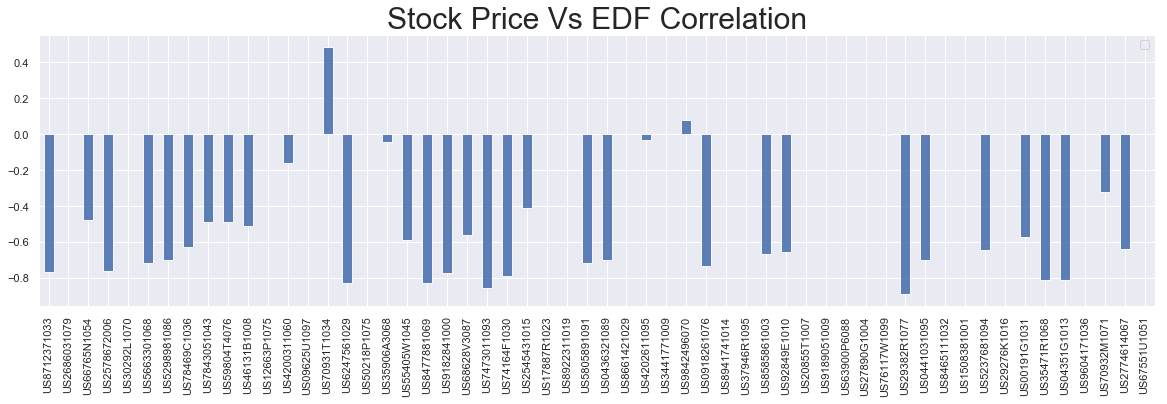

In [177]:
# Plot correlation
ax = corr.plot.bar(figsize=(20,5), alpha=0.9)
ax.set_title('Stock Price Vs EDF Correlation', fontsize=30)
ax.legend('')
plt.show()

In [152]:
# Inspect outliers
corr[corr['Correlation'] > 0]

,Correlation
US70931T1034,0.487139
US9842496070,0.078097


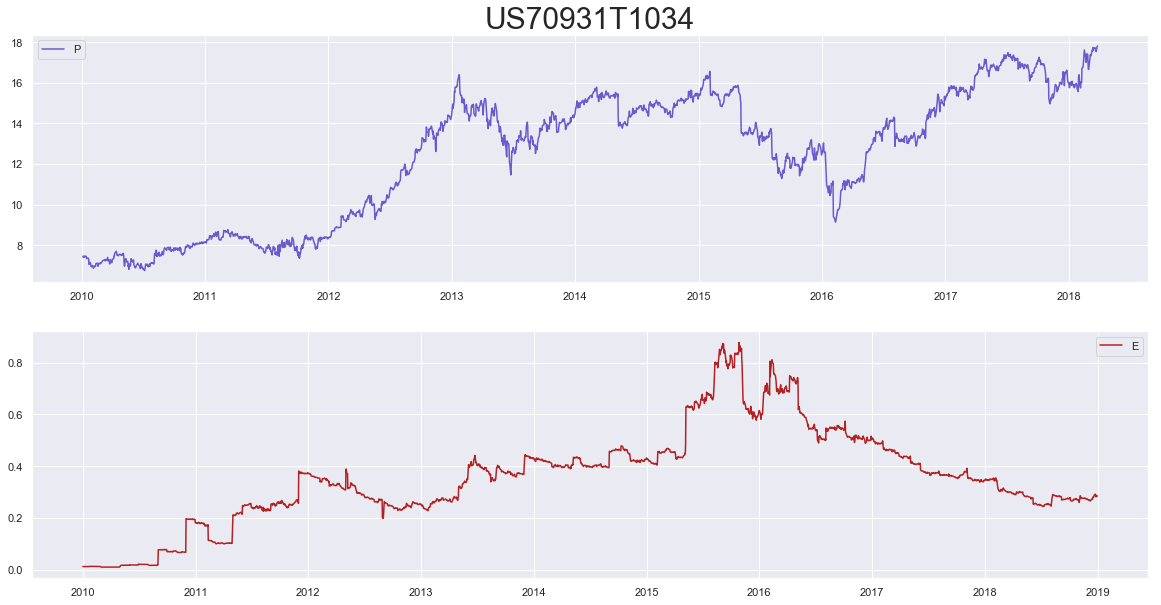

In [141]:
# Plot outlier 
fig, ax = plt.subplots(2,1, figsize=(20,10))
ax[0].plot(price_series['US70931T1034'], color='slateblue')
ax[1].plot(edf['US70931T1034'], color='firebrick')
ax[0].set_title('US70931T1034', fontsize=30)
ax[0].legend('Price Series')
ax[1].legend('EDF')
plt.show()

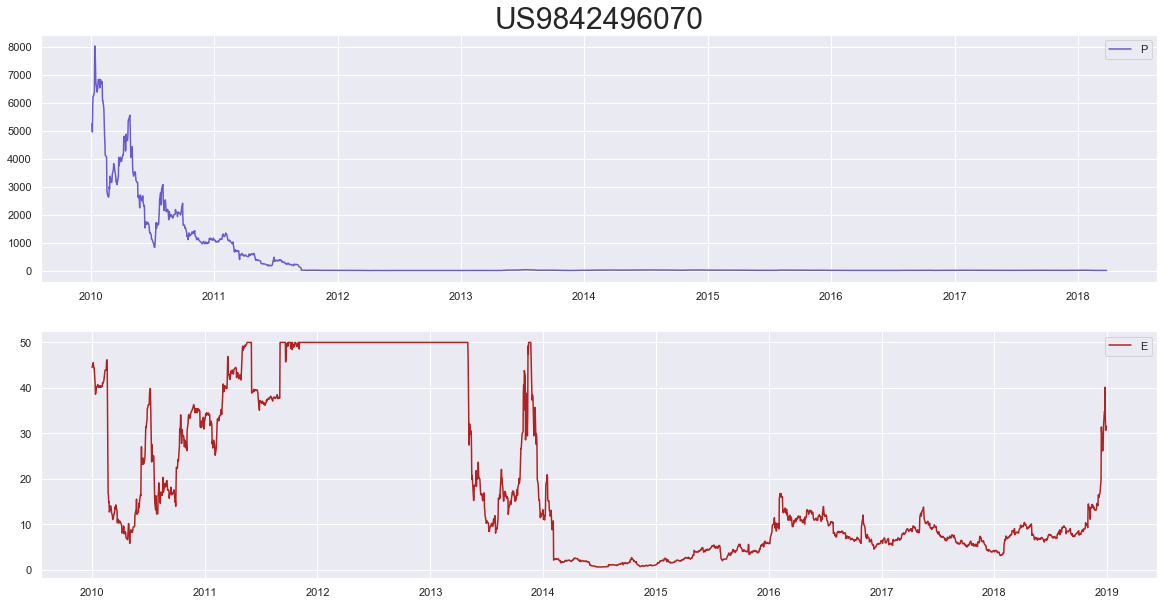

In [142]:
# Plot outlier 
fig, ax = plt.subplots(2,1, figsize=(20,10))
ax[0].plot(price_series['US9842496070'], color='slateblue')
ax[1].plot(edf['US9842496070'], color='firebrick')
ax[0].set_title('US9842496070', fontsize=30)
ax[0].legend('Price Series')
ax[1].legend('EDF')
plt.show()

In [156]:
# Mean correlation 
corr[corr['Correlation'] < 0].mean()[0]

-0.5978372681532838